In [1]:
%config Completer.use_jedi = False

In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

In [32]:
def plot_loss_curves(experiment_metrics, model):
    experiment_metrics = experiment_metrics
    plt.plot(
        [x['iteration'] for x in experiment_metrics if 'total_loss' in x], 
        [x['total_loss'] for x in experiment_metrics if 'total_loss' in x])
    plt.plot(
        [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
        [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x])
    plt.legend(['total_loss', 'validation_loss'], loc='upper left')
    plt.title(model)
    plt.show()

In [33]:
exp_dir = "/raid/medha12/Bacteria/training-output/"
exp_name = "collagen_sticking_optical_flow_median_bkg_more_data"

################# stick #################


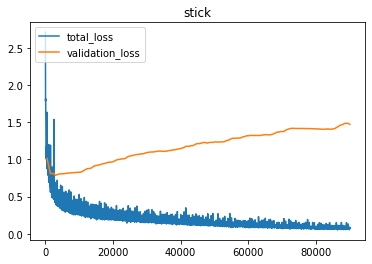

lowest initilaized
lowest val loss:  0.7836971680385788
best model:  2999
################# motile #################


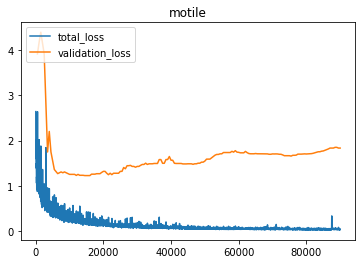

lowest initilaized
lowest val loss:  1.223948205780067
best model:  14499
################# non_motile #################


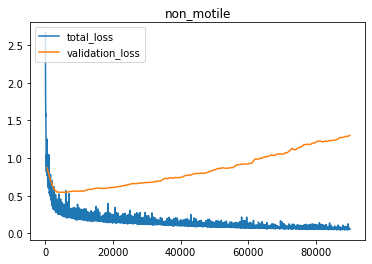

lowest initilaized
lowest val loss:  0.5453067110659725
best model:  4499


In [34]:
models = {"stick":"stick_90k_00125", "motile":"motile_90k_00125", "non_motile": "non_motile_90k_00125"}

for model in models.keys():
    print("#################", model, "#################")
    model_name = models[model]
    experiment_folder = f'{exp_dir}/{exp_name}/{model_name}/'
    experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
    

    plot_loss_curves(experiment_metrics, model)
    find_best(experiment_metrics, debug_mode=False)

In [30]:
experiment_metrics[0].keys()

dict_keys(['data_time', 'eta_seconds', 'iteration', 'loss_box_reg', 'loss_cls', 'lr', 'num_pos_anchors', 'time', 'timetest', 'total_loss'])

In [8]:
experiment_metrics[24]

{'bbox/AP': 14.955130657351242,
 'bbox/AP50': 33.26832340804315,
 'bbox/AP75': 8.671685959646258,
 'bbox/APl': nan,
 'bbox/APm': nan,
 'bbox/APs': 14.955130657351242,
 'data_time': 0.006067636422812939,
 'eta_seconds': 65888.4577092249,
 'iteration': 499,
 'loss_box_reg': 0.31455570459365845,
 'loss_cls': 0.4889373481273651,
 'lr': 0.00062437625,
 'num_pos_anchors': 197.0,
 'time': 0.7451551980338991,
 'timetest': 12.0,
 'total_loss': 0.7935905456542969,
 'validation_loss': 0.8696295722404399}

In [14]:
experiment_metrics[-1]


{'data_time': 0.006274982821196318,
 'eta_seconds': 66346.83928037994,
 'iteration': 4979,
 'loss_box_reg': 0.10345917195081711,
 'loss_cls': 0.14932896196842194,
 'lr': 0.00125,
 'num_pos_anchors': 253.875,
 'time': 0.7785146841779351,
 'timetest': 12.0,
 'total_loss': 0.24776822328567505}

In [29]:
def find_best(experiment_metrics, debug_mode =False):
    lowest = None
    best_model_iteration = None
    best_model_val_loss = None
    for metrics in experiment_metrics:
        if 'validation_loss' in metrics:
            if debug_mode: print(metrics["validation_loss"]) 
            if lowest is None:
                lowest = metrics["validation_loss"]
                print("lowest initilaized")
            if metrics["validation_loss"] < lowest:
                lowest = metrics["validation_loss"]
                best_model_iteration = metrics["iteration"]
                best_model_val_loss = lowest
                if debug_mode: print("lowest changed")
                if debug_mode: print("Checkpoint: ",metrics["iteration"]) 
    print("lowest val loss: ", best_model_val_loss)
    print("best model: ", best_model_iteration)
    return best_model_iteration
                                                      
        